# SuperKnowa Model Evaluation on IBM Gen Al

In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import datetime
%matplotlib inline

In [14]:
ls

Auto_leaderboard.sh                QuAC_Bloom.csv
CoQA_Bert-Fine-Tune.csv            QuAC_FlanT5-XXL.csv
CoQA_FlanT5-XL.csv                 Result/
CoQA_FlanT5-XXL.csv                SAP-Doc-Solr_Bloom.csv
Final_evaluation_table.py          SAP-Doc-Solr_Coga.csv
IBM-Test-Product-Wise_Bloom.csv    SAP-Doc-Solr_FlanT5-XXL.csv
MLFlow_Evaluation.ipynb            SAP-passages_Bloom.csv
Manually-Curated_Bloom.csv         SAP-passages_Coga.csv
Manually-Curated_Coga.csv          SAP-passages_FlanT5-XXL.csv
Manually-Curated_FlanT5.csv        SuperKnowa Model Evaluation.ipynb
Manually-Curated_Flan_ul2.csv      TidyQA_FlanT5-XXL.csv
Prepare_alpaca.ipynb               mlruns/
QuAC-Random_FlanT5-XXL.csv         score.py


#### Dataset Used For evaluation the Model
- Sap Data
- IBM Test Data
- Curated Data
- CoQA Data
- QoAC Data
- TidyQA Data

#### Model Used for evaluation with
- COGA
- FlanT5-XL
- FlanT5-XXL
- Bloom

#### Evaluation Matrix used
- blue score
- meteor score
- rouge score
- SentenceSim score
- SimHash score
- perplexity score
- bleurt score
- F1 score
- Bert Score

In [69]:
# import pandas as pd
# import glob
# import matplotlib.pyplot as plt
# #
# # Define the list of scores
# scores = ['blue score', 'meteor score', 'rouge score', 'SentenceSim score', 'SimHash score', 'perplexity score', 'bleurt score', 'F1 score']

# # Calculate the number of rows and columns for subplots
# num_plots = len(scores)
# num_cols = 1
# num_rows = (num_plots + num_cols - 1) // num_cols

# # Create the subplots with appropriate size
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8*num_rows))

# # Flatten the axes array to iterate through
# axes = axes.flatten()

# # Load all CSV files into a list of dataframes
# csv_files = glob.glob("*.csv")
# dfs = [pd.read_csv(file) for file in csv_files]


# # Iterate over the scores and create subplots
# for i, score in enumerate(scores):
#     averages = []
#     for df, file in zip(dfs, csv_files):
#         model_name = file.split(".")[0]
#         if score in df.columns:
#             avg_score = df[score].mean()
#         else:
#             avg_score = None  # Assign null or any other desired value
#         averages.append({"model_name": model_name, "average_score": avg_score})
        
#         # Extract dataset and model name using regex pattern
#         pattern = r'^(.*?)_(.*)$'
#         match = re.match(pattern, model_name)
#         if match:
#             dataset = match.group(1)
#         else:
#             dataset = ""
        

#     # Create a new DataFrame to store the average score for each model
#     results_df = pd.DataFrame(averages)

#     # Sort the DataFrame by the average score in descending order
#     results_df = results_df.sort_values(by="average_score", ascending=False)

#     # Create a bar chart for the current score
#     ax = axes[i]
#     ax.bar(results_df["model_name"], results_df["average_score"])
#     ax.set_title(f"Average {score}", fontsize=36) 
#     ax.set_ylabel("Score")
#     ax.tick_params(axis='x', rotation=90)

#     # Modify x-axis labels
#     #modified_labels = [label.split("_")[-1] for label in results_df["model_name"]]
#     ax.set_xticks(range(len(results_df["model_name"])))  # Set the tick positions
#     ax.set_xticklabels(results_df["model_name"])  # Set the tick labels

#     # Rotate x-axis labels for the second last bar chart
#     if i == num_plots - 2:
#         ax.tick_params(axis='x', rotation=0)

# # Remove any unused subplots
# if len(scores) < num_plots:
#     for j in range(len(scores), num_plots):
#         fig.delaxes(axes[j])

# # Adjust spacing between subplots
# fig.tight_layout()

# # Display the plots
# plt.show()


<h1 align="center">Parameters used for Experiment</h1>

| Model Name  | Temperature | Top P | Top K | Decoding Method | Min New Tokens | Max New Tokens | Stop Sequences |
|-------------|-------------|-------|-------|-----------------|----------------|----------------|----------------|
| Bloom       | 0.3         | -     | -     | -               | 10             | 200            | ['Question']   |
| FlanT5-XXL  | 0.7         | 1     | 50    | Greedy          | 10             | 200            | -              |
| FlanT5-XL   | 0.7         | 1     | 50    | Greedy          | 10             | 200            | -              |
| FlanT5      | 0.7         | 1     | 50    | Greedy          | 10             | 200            | -              |
| Coga        | 0.7         | 1     | 50    | Greedy          | 10             | 200            | -              |
| Flan_ul2    | 0.7         | 1     | 50    | Greedy          | 10             | 200            | -              |


In [16]:
import pandas as pd
import re
import glob

# List of file names
csv_files = glob.glob("*.csv")

# Define model size mappings
model_size_mapping = {
    'Bloom': '176B',
    'Bloom_internal':'176B',
    'FlanT5-XXL': '11B',
    'FlanT5-XL':'3B',
    'FlanT5': '3B',
    'Coga': '3B',
    'Flan_ul2':'20B'
}

# Create an empty DataFrame
leaderboard = pd.DataFrame(columns=['Model Name', 'Dataset', 'F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score', 'Count', 'Model Size'])

# Iterate over the scores files
for file in csv_files:
    model_name = file.split(".")[0]
    # Extract dataset and model name using regex pattern
    pattern = r'^(.*?)_(.*)$'
    match = re.match(pattern, model_name)
    if match:
        dataset = match.group(1)
        model = match.group(2)
    else:
        dataset = ""
        model = model_name
    
    # Get the model size based on the model name
    model_size = model_size_mapping.get(model, "")

    df = pd.read_csv(file)  # Assuming the scores are stored in CSV format
        # Get the file's creation date
    creation_time = os.path.getctime(file)
    creation_time = datetime.datetime.fromtimestamp(creation_time).strftime('%Y-%m-%d') 
    
    
    
    # Get the mean scores for available columns
    mean_scores = {}
    for score in leaderboard.columns[2:-2]:
        # Perform a case-insensitive match for score column names
        available_columns = [col for col in df.columns if col.lower() == score.lower()]
        if available_columns:
            if score not in ['SimHash Score', 'Perplexity Score', 'Bleurt Score']:
                mean_scores[score] = df[available_columns[0]].mean() * 100  # Multiply score by 100
            else:
                mean_scores[score] = df[available_columns[0]].mean()
        else:
            mean_scores[score] = None  # Assign null or any other desired value

    leaderboard = leaderboard.append({'Model Name': model, 'Evaluated on': dataset, **mean_scores,'Experiment Date':creation_time, 'Count': len(df), 'Model Size': model_size}, ignore_index=True)

# Move null values to the bottom of the table
leaderboard = leaderboard.sort_values(by=leaderboard.columns[2:-2].tolist(), na_position='last')

# Display the leaderboard
result = leaderboard[['Model Name', 'Evaluated on','Experiment Date', 'Count', 'Model Size', 'F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']]

result = result.sort_values(["Evaluated on","Model Name"]).reset_index(drop=True)
result = result[result["F1 Score"] > 4]
result

# New table to merge
new_table = pd.DataFrame({
    'Model Name': ['Bloom', 'FlanT5-XXL', 'FlanT5-XL', 'FlanT5', 'Coga', 'Flan_ul2'],
    'Temperature': [0.3, 0.7, 0.7, 0.7, 0.7, 0.7],
    'Top P': ['-', 1, 1, 1, 1, 1],
    'Top K': ['-', 50, 50, 50, 50, 50],
    'Decoding Method': ['sample', 'Greedy', 'Greedy', 'Greedy', 'Greedy', 'Greedy'],
    'Min New Tokens': [10, 10, 10, 10, 10, 10],
    'Max New Tokens': [200, 200, 200, 200, 200, 200],
    'Stop Sequences': ['Question', '-', '-', '-', '-', '-']
})

# Merge the two tables based on the "Model Name" column
merged_table = pd.merge(result, new_table, on='Model Name', how='outer')
merged_table

/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12157/2293250853.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append({'Model Name': model, 'Evaluated on': dataset, **mean_scores,'Experiment Date':creation_time, 'Count': len(df), 'Model Size': model_size}, ignore_index=True)
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12157/2293250853.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append({'Model Name': model, 'Evaluated on': dataset, **mean_scores,'Experiment Date':creation_time, 'Count': len(df), 'Model Size': model_size}, ignore_index=True)
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12157/2293250853.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

,Model Name,Evaluated on,Experiment Date,Count,Model Size,F1 Score,BERT Score,Blue Score,SentenceSim Score,Meteor Score,...,SimHash Score,Perplexity Score,Bleurt Score,Temperature,Top P,Top K,Decoding Method,Min New Tokens,Max New Tokens,Stop Sequences
0,Bert-Fine-Tune,CoQA,2023-06-08,894,,24.135412,65.800030,3.071158,53.408677,25.745435,...,26.129754,21.106700,-0.672618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FlanT5-XL,CoQA,2023-06-08,1000,3B,30.364943,57.250804,8.442297,57.049055,29.006842,...,24.242000,20.438341,-0.466665,0.7,1,50,Greedy,10.0,200.0,-
2,FlanT5-XXL,CoQA,2023-06-08,1000,11B,34.157034,59.122397,9.758095,62.085974,31.768646,...,23.672000,20.183777,-0.395824,0.7,1,50,Greedy,10.0,200.0,-
3,FlanT5-XXL,QuAC,2023-06-08,1000,11B,47.805623,64.415740,34.259328,62.261290,52.253325,...,18.861000,18.669937,-0.224447,0.7,1,50,Greedy,10.0,200.0,-
4,FlanT5-XXL,QuAC-Random,2023-06-08,1000,11B,43.319247,59.402350,28.975997,57.656522,39.401246,...,20.433000,13.125658,-0.486478,0.7,1,50,Greedy,10.0,200.0,-
5,FlanT5-XXL,SAP-Doc-Solr,2023-06-08,101,11B,13.255023,55.671842,0.972675,40.838284,15.379507,...,28.227723,26.157921,NaN,0.7,1,50,Greedy,10.0,200.0,-
6,FlanT5-XXL,SAP-passages,2023-06-08,101,11B,44.842101,64.759613,19.669152,71.116817,46.715969,...,18.366337,22.580770,-0.198494,0.7,1,50,Greedy,10.0,200.0,-
7,FlanT5-XXL,TidyQA,2023-06-07,1001,11B,34.906116,46.847450,11.118910,58.581535,23.946688,...,22.049950,4.727973,-0.626729,0.7,1,50,Greedy,10.0,200.0,-
8,Bloom,IBM-Test-Product-Wise,2023-06-12,59,176B,4.803944,47.305087,0.005181,29.286199,2.706396,...,29.532586,9.248362,-0.958093,0.3,-,-,sample,10.0,200.0,Question
9,Bloom,Manually-Curated,2023-06-08,20,176B,25.492804,58.323080,6.235226,69.483257,7.236587,...,22.400000,34.688504,-0.409929,0.3,-,-,sample,10.0,200.0,Question


### Evaluated on and Model wise F1 Score

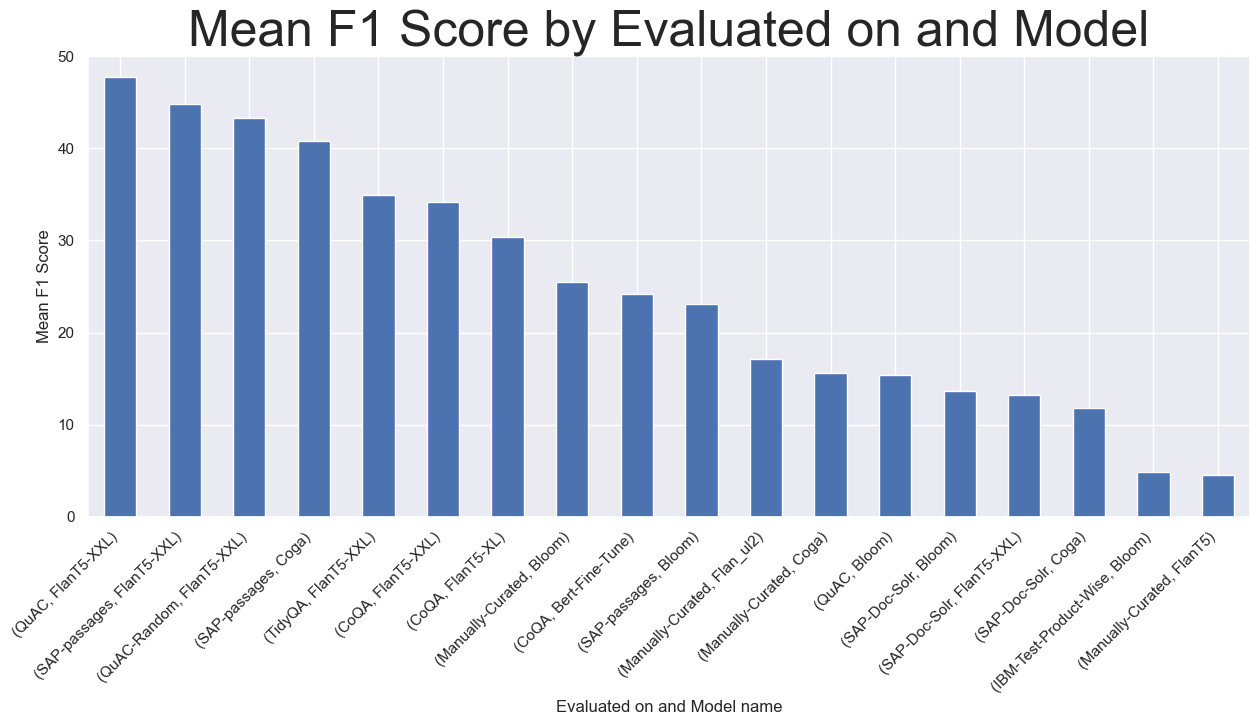

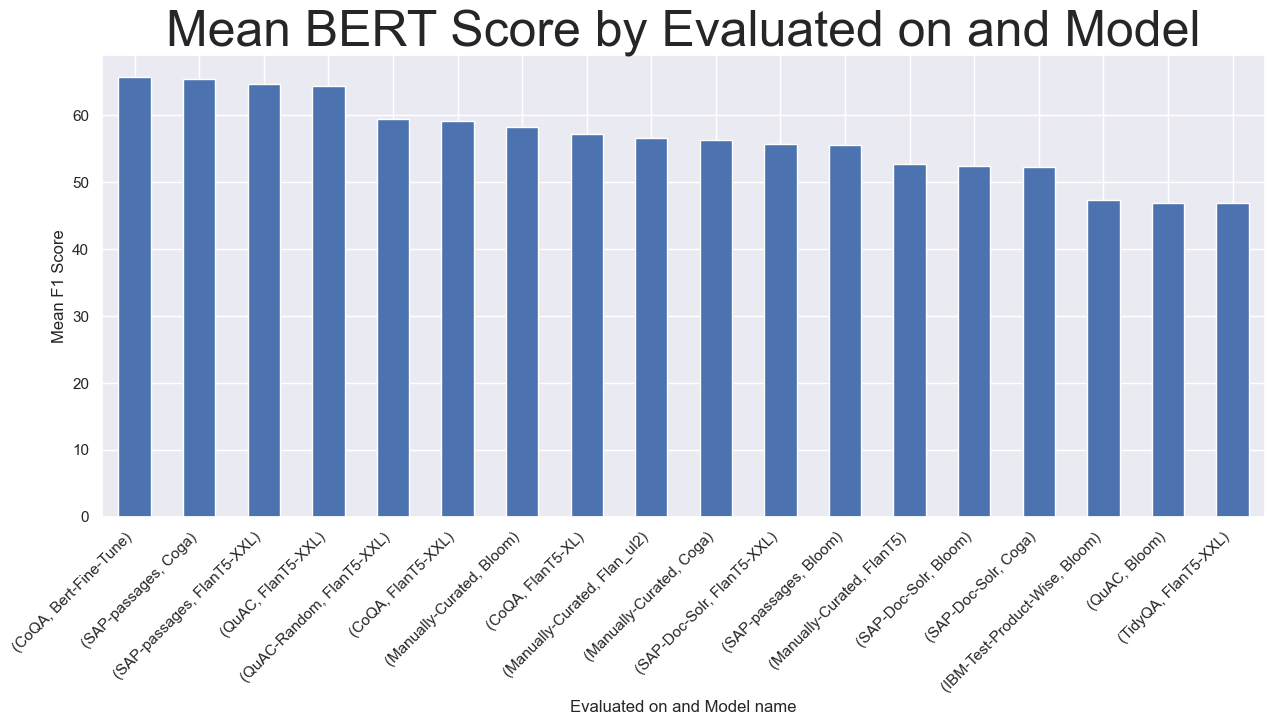

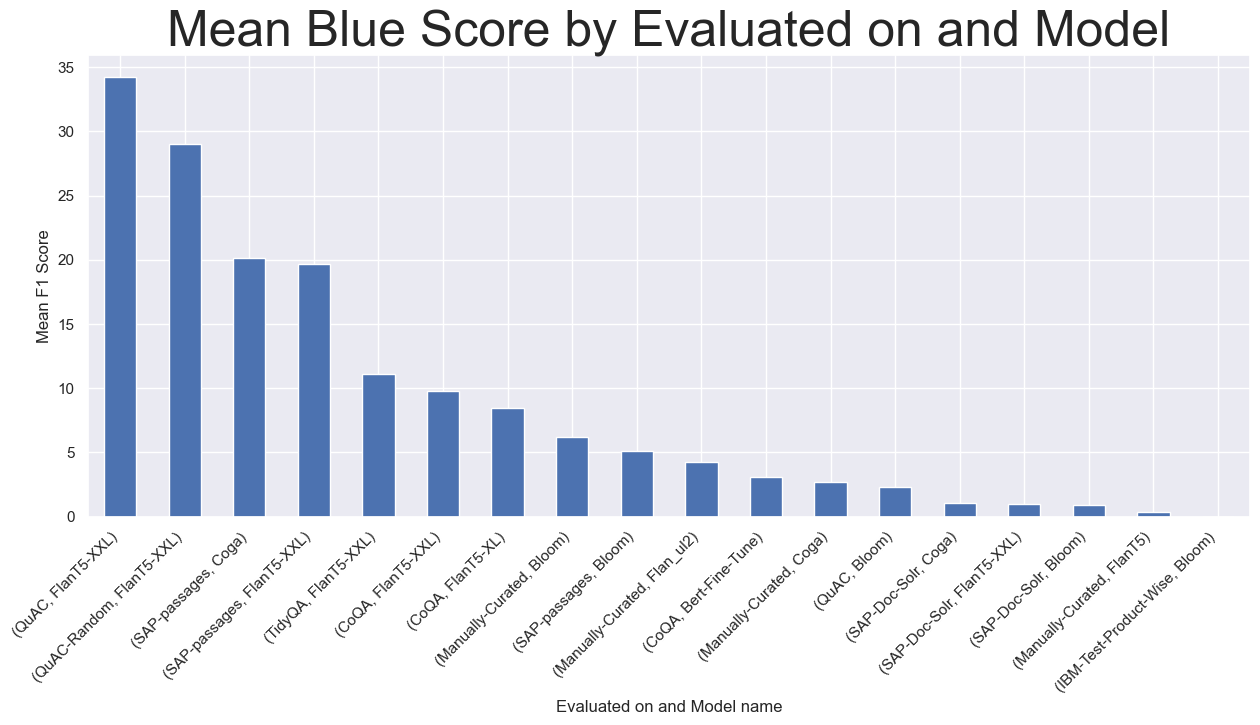

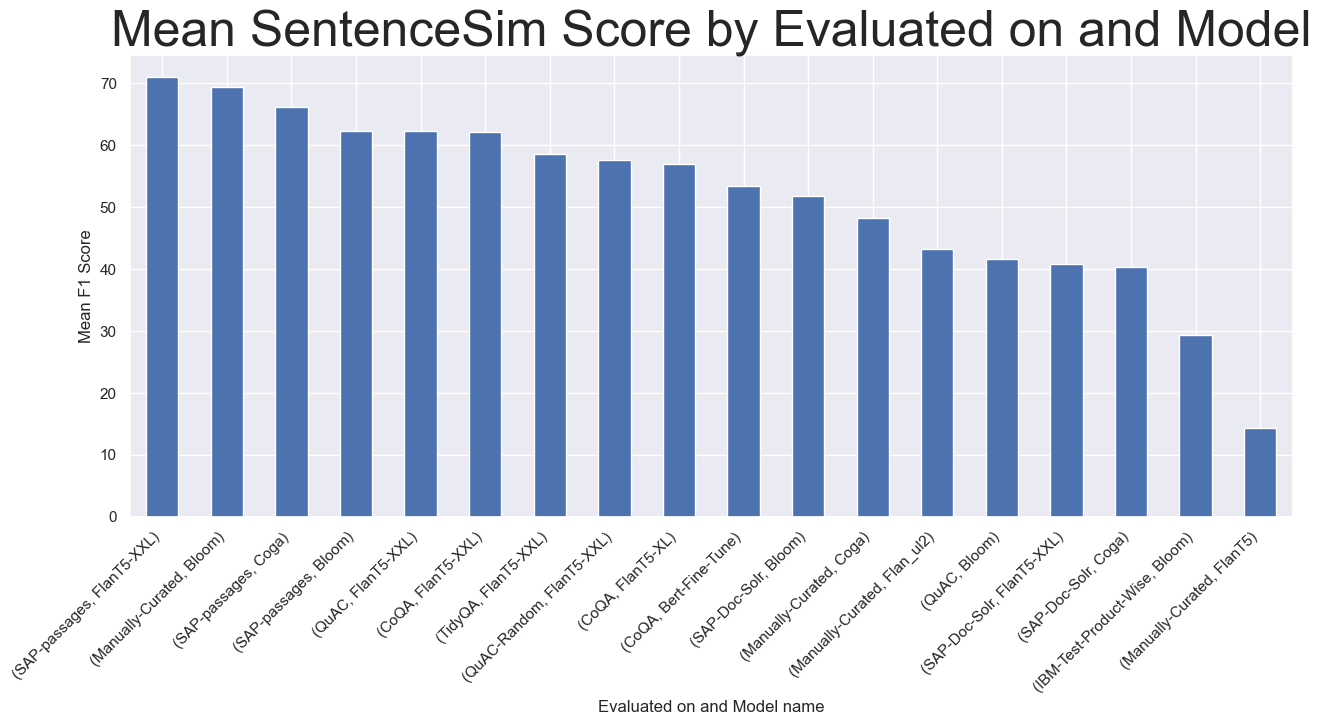

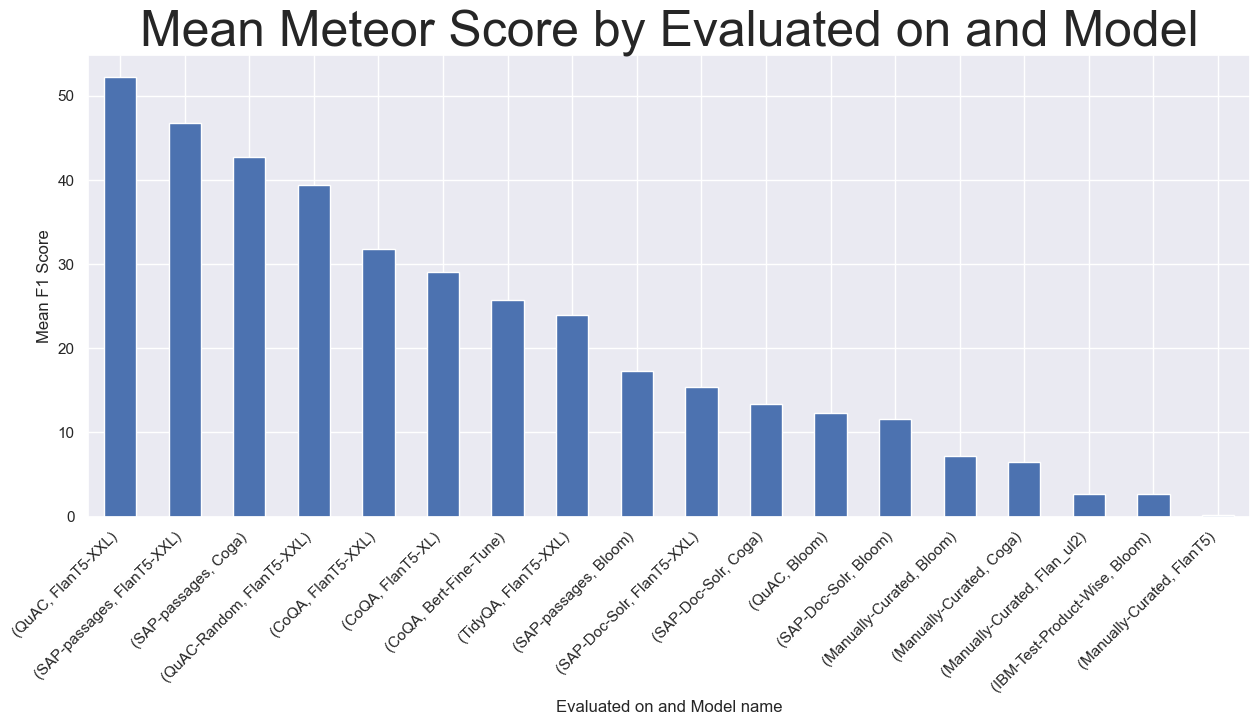

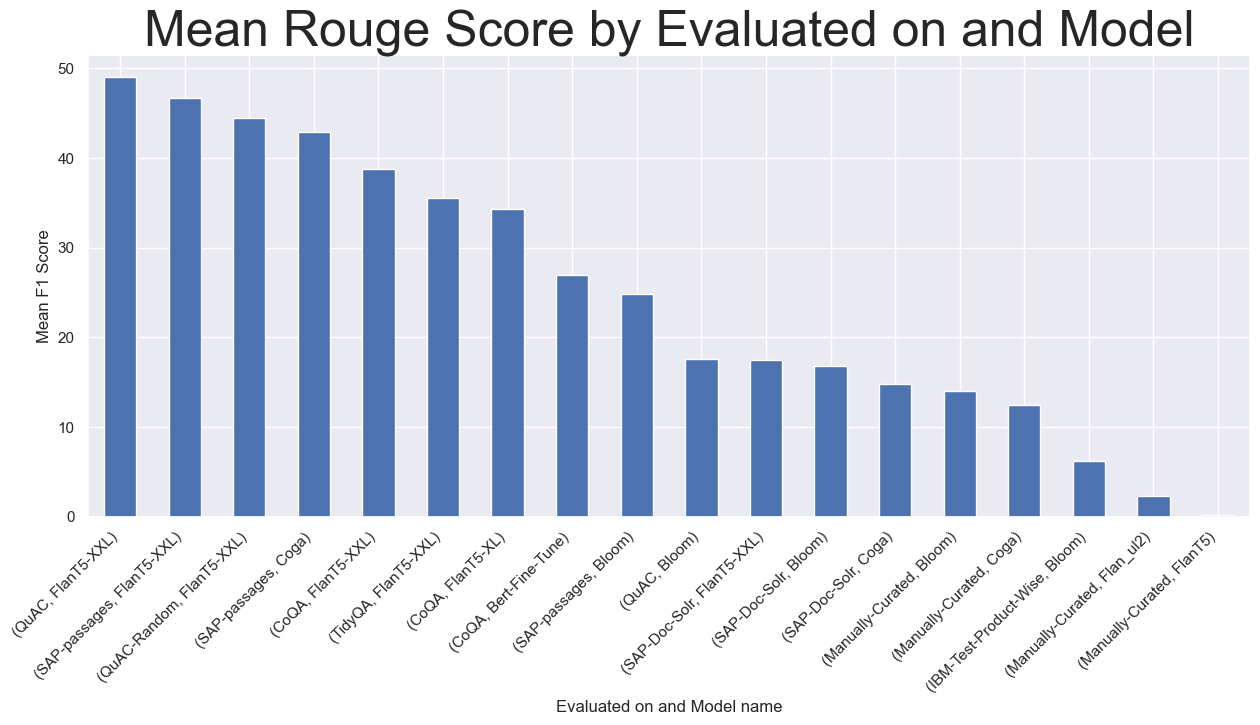

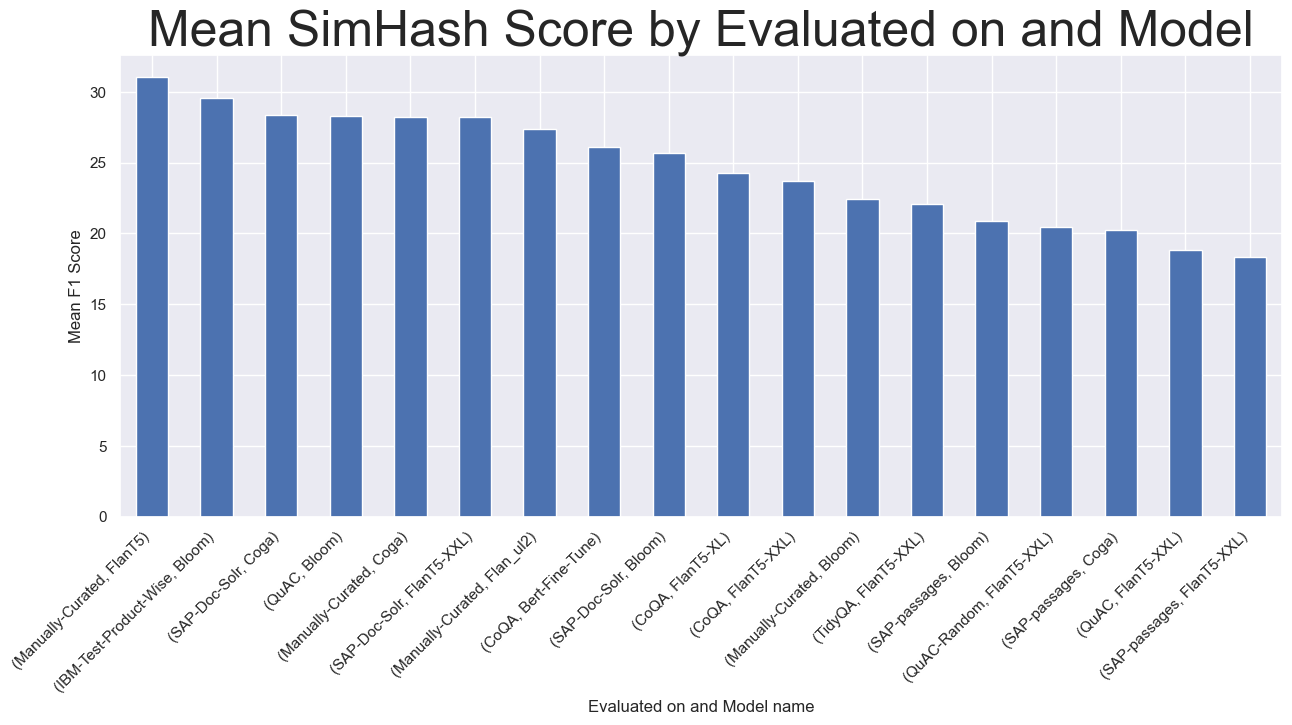

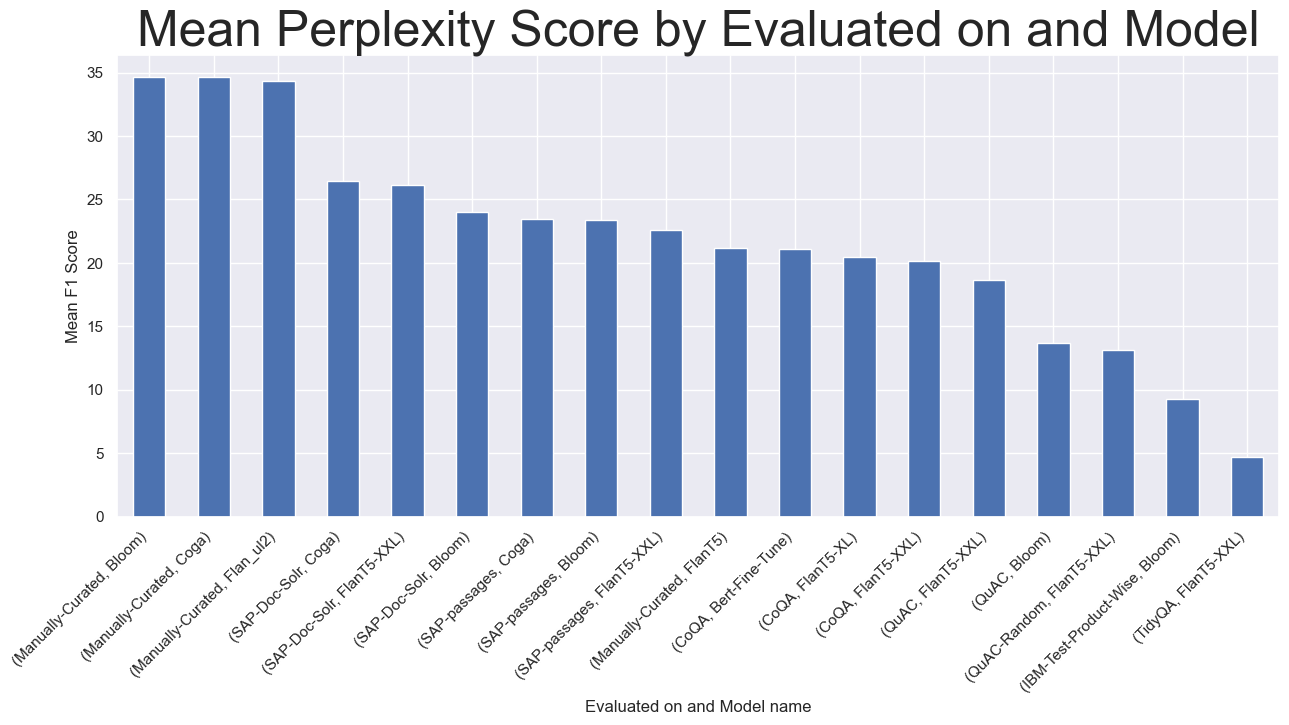

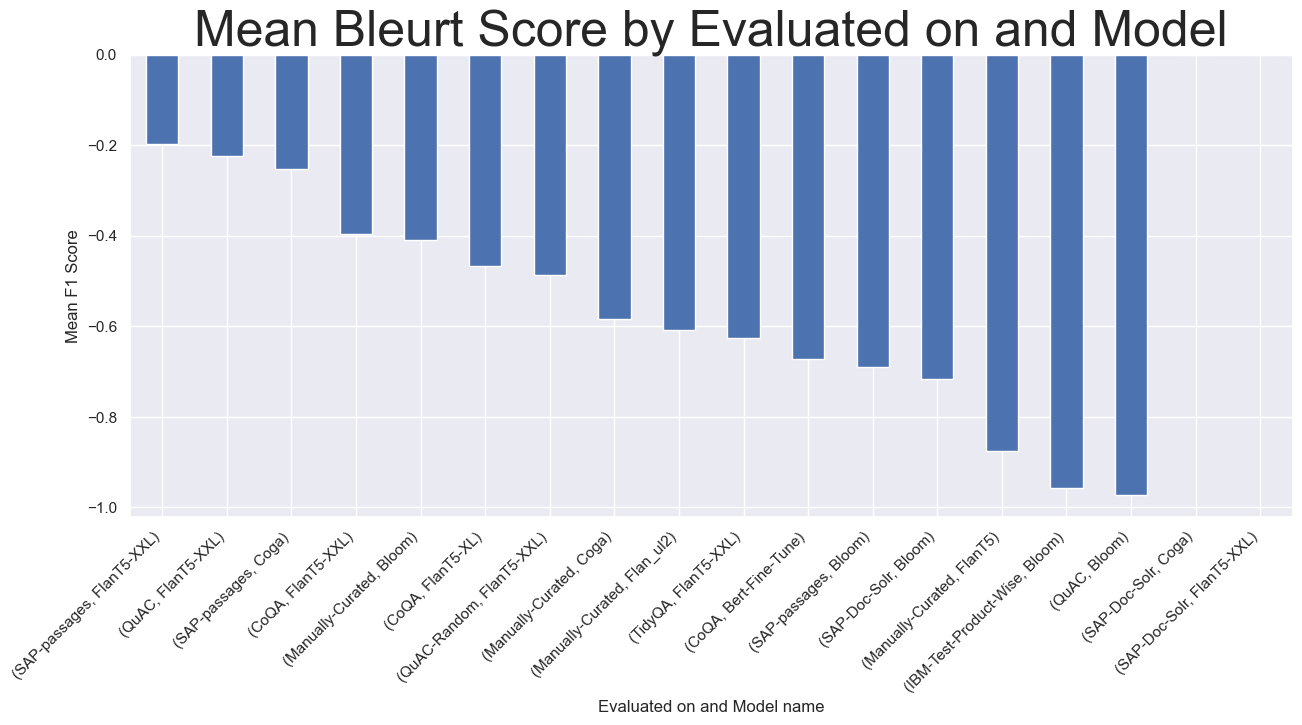

In [73]:

scores = ['F1 Score', 'BERT Score', 'Blue Score', 'SentenceSim Score', 'Meteor Score', 'Rouge Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score']

for score in scores:
    # Group by Model Name and calculate the mean F1 Score
    mean_scores = result.groupby(["Evaluated on","Model Name"]).mean(numeric_only=True)[score].sort_values(ascending=False)

    # Set the plot size
    plt.figure(figsize=(15, 6))

    # Plot the mean F1 Score as a bar plot
    mean_scores.plot(kind="bar")

    # Customize the plot
    plt.xlabel("Evaluated on and Model name")
    plt.ylabel("Mean F1 Score")
    plt.xticks(rotation=45, ha='right')
    plt.title("Mean "+score+" by Evaluated on and Model", fontsize=36)

    # Display the plot
    plt.show()
    print("\n\n\n")